
📌 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             1000 non-null   object 
 1   regiao           1000 non-null   object 
 2   chuva_mm         1000 non-null   float64
 3   nivel_rio_m      1000 non-null   float64
 4   previsao_temp_c  1000 non-null   float64
 5   umidade_%        1000 non-null   float64
 6   idh              1000 non-null   float64
 7   populacao        1000 non-null   int64  
 8   risco_enchente   1000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB
None

🔍 Verificando valores nulos:
data               0
regiao             0
chuva_mm           0
nivel_rio_m        0
previsao_temp_c    0
umidade_%          0
idh                0
populacao          0
risco_enchente     0
dtype: int64

📊 Estatísticas descritivas:
          chuva_mm  nivel_rio_m  

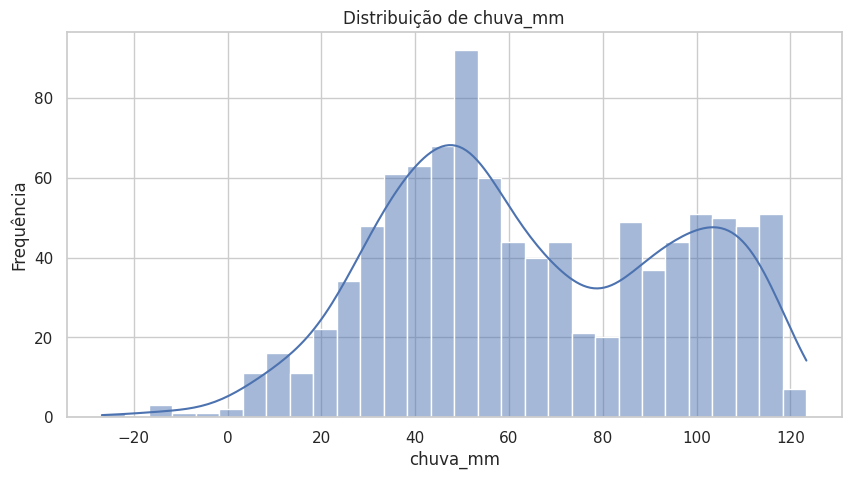

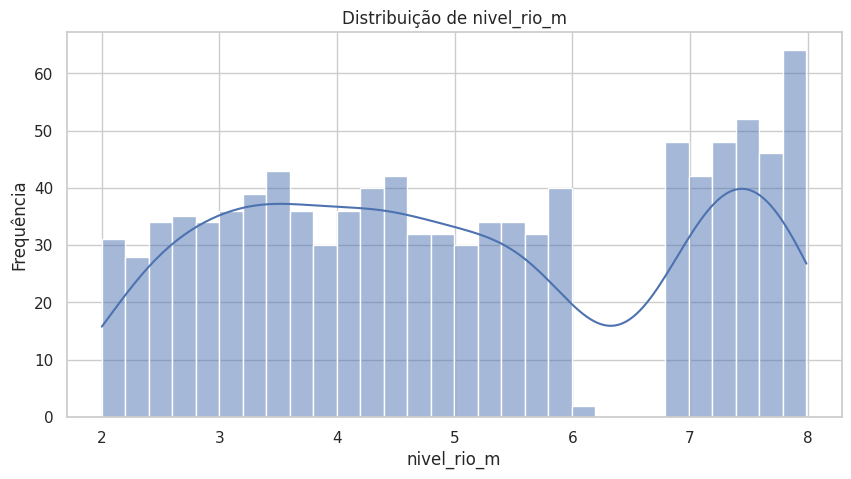

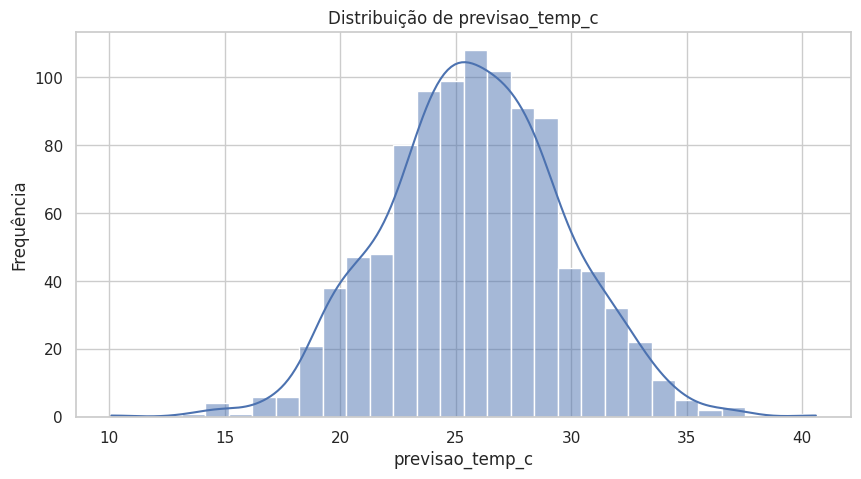

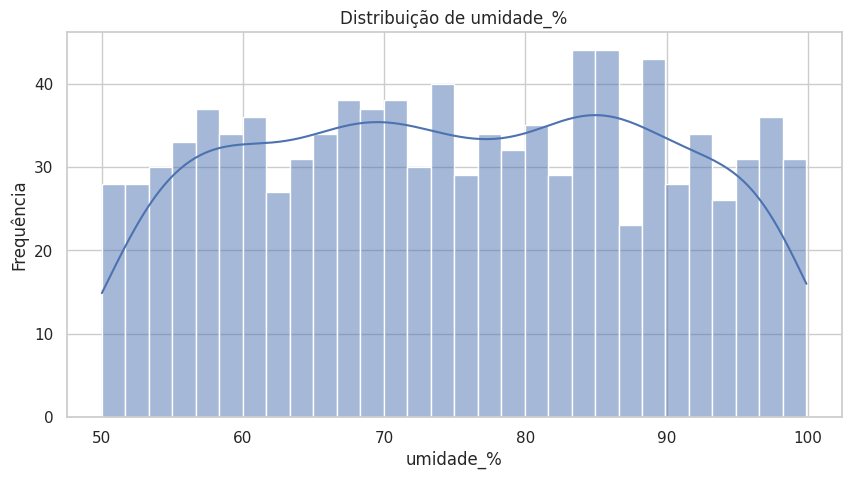

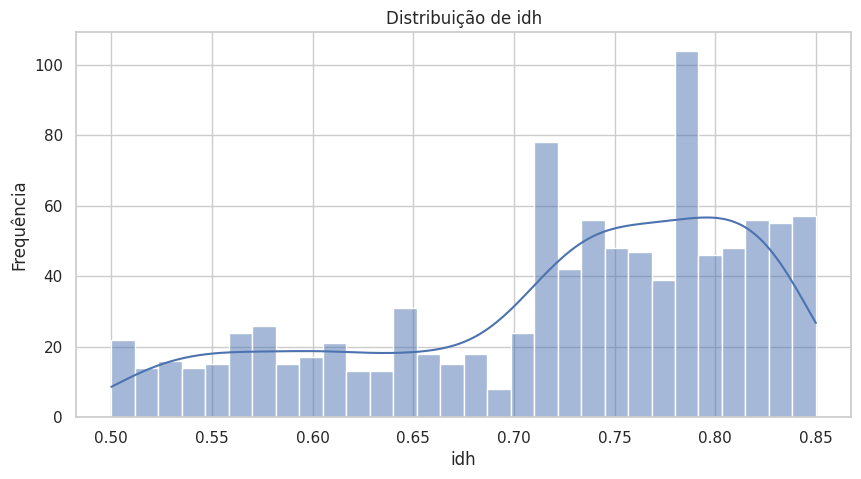

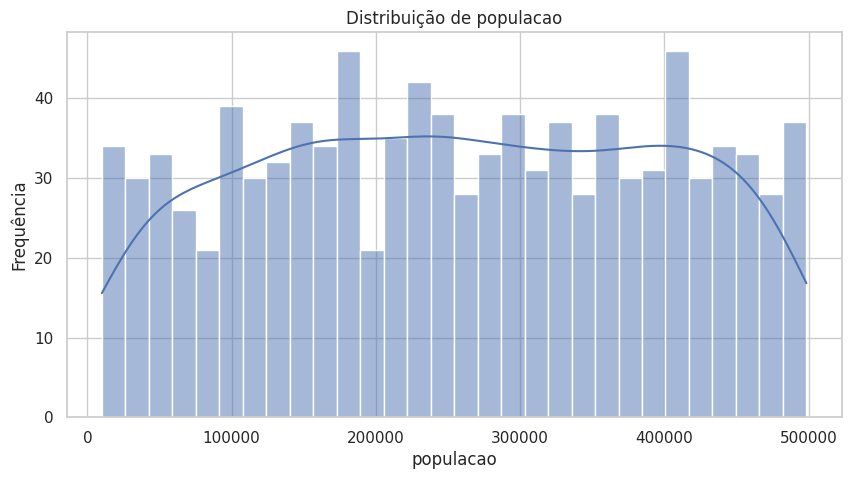

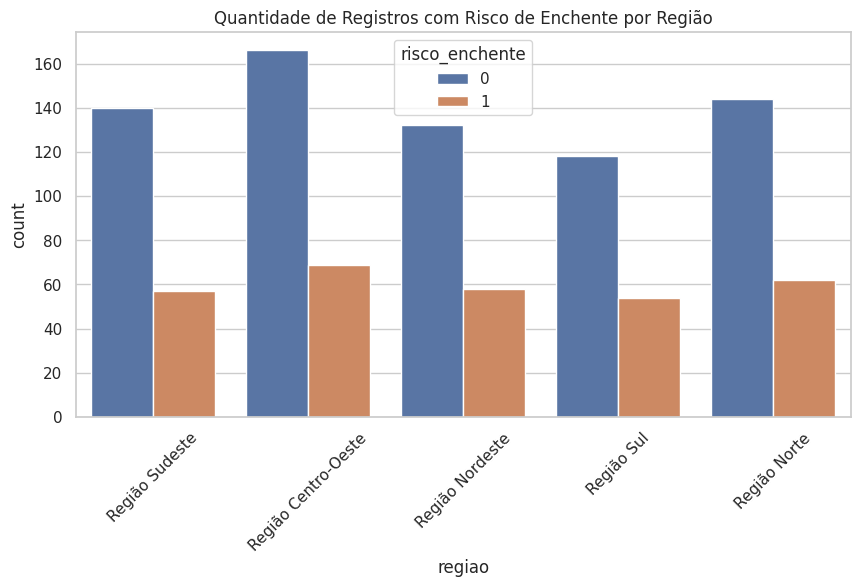

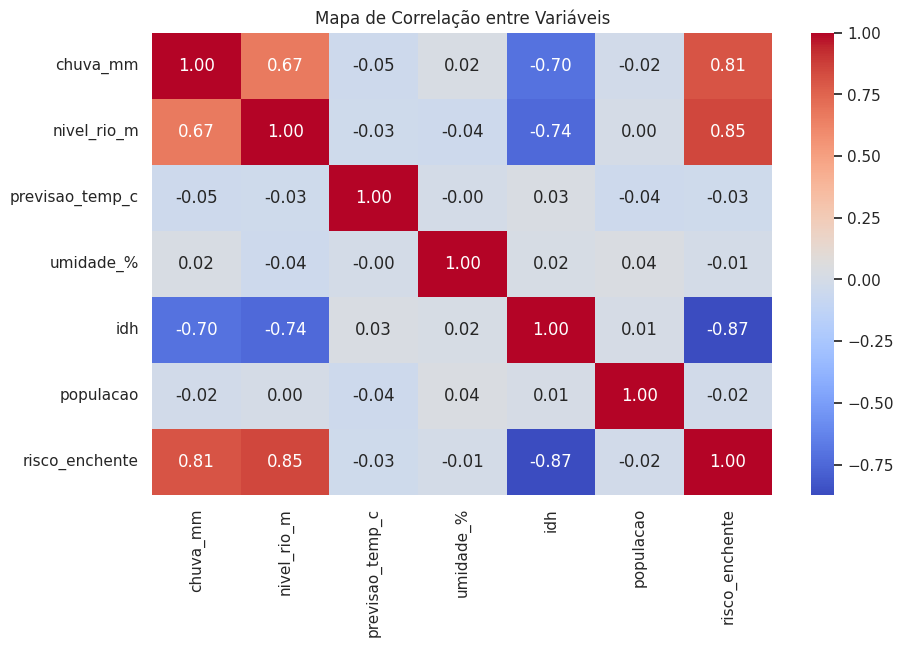

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 02. IMPORTAR O DATASET
df = pd.read_csv('/dataset_enchentes.csv')
df.head()

print("\n📌 Informações do Dataset:")
print(df.info())

print("\n🔍 Verificando valores nulos:")
print(df.isnull().sum())

print("\n📊 Estatísticas descritivas:")
print(df.describe())

features = ['chuva_mm', 'nivel_rio_m', 'previsao_temp_c', 'umidade_%', 'idh', 'populacao']

for col in features:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

plt.figure()
sns.countplot(data=df, x='regiao', hue='risco_enchente')
plt.title('Quantidade de Registros com Risco de Enchente por Região')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
correlation = df.drop(columns=["data", "regiao"]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Correlação entre Variáveis")
plt.show()


# **PARTE 2**

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        60

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



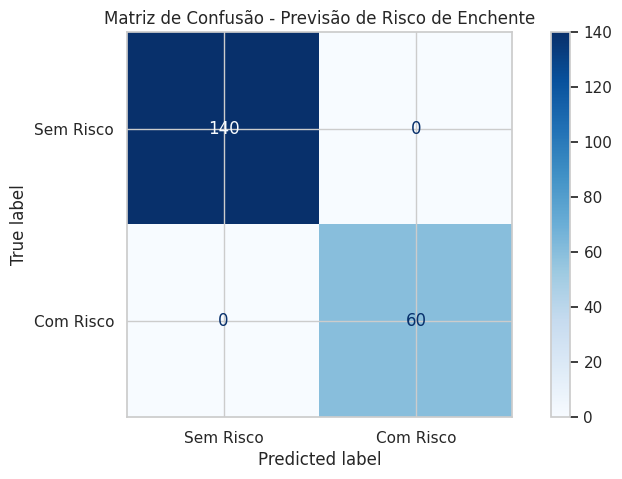

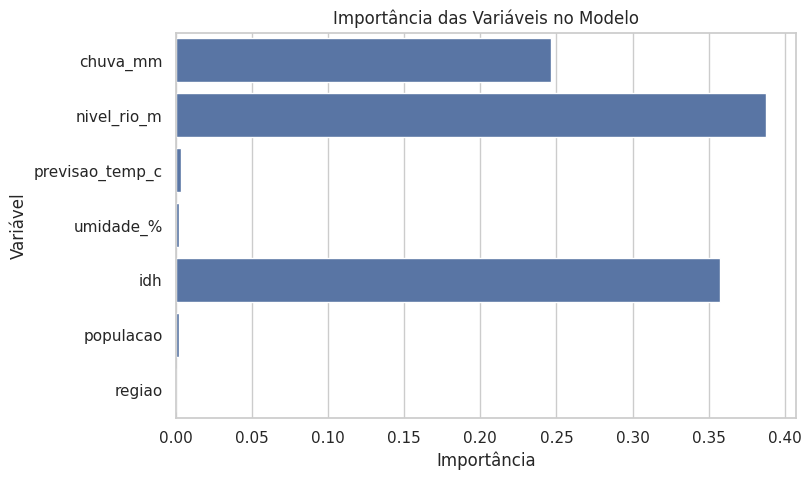

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


df_model = df.copy()
df_model['regiao'] = LabelEncoder().fit_transform(df_model['regiao'])

X = df_model[['chuva_mm', 'nivel_rio_m', 'previsao_temp_c', 'umidade_%', 'idh', 'populacao', 'regiao']]
y = df_model['risco_enchente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

modelo = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem Risco", "Com Risco"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Previsão de Risco de Enchente")
plt.show()

importances = modelo.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

# **ETAPA 3**

In [ ]:
probs = modelo.predict_proba(X_test)

alertas = []
for i, prob in enumerate(probs):
    risco = prob[1]
    if risco >= 0.7:
        registro = X_test.iloc[i]
        alertas.append({
            "data": df_model.iloc[X_test.index[i]]['data'],
            "regiao": df_model.iloc[X_test.index[i]]['regiao'],
            "chuva_mm": registro['chuva_mm'],
            "nivel_rio_m": registro['nivel_rio_m'],
            "prob_risco": round(risco * 100, 2),
            "mensagem": "⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomendada!"
        })

df_alertas = pd.DataFrame(alertas)

if not df_alertas.empty:
    print("🚨 ALERTAS GERADOS:")
    display(df_alertas)
else:
    print("✅ Nenhum alerta gerado com risco acima de 70% nos dados de teste.")

df_alertas.to_csv('alertas_gerados.csv', index=False)


🚨 ALERTAS GERADOS:


,data,regiao,chuva_mm,nivel_rio_m,prob_risco,mensagem
0,2024-05-03,1,99.4,7.59,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
1,2024-04-14,4,111.3,7.17,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
2,2024-03-02,3,95.3,6.87,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
3,2024-06-07,2,100.0,7.87,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
4,2024-02-16,0,97.0,7.71,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
5,2024-02-09,3,88.3,7.18,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
6,2024-04-03,4,92.8,7.31,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
7,2024-05-23,3,106.1,7.98,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
8,2024-05-20,0,89.0,7.56,99.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
9,2024-05-13,3,114.1,7.75,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...


In [ ]:
# 01. PREVISÃO DE PROBABILIDADE
probs = modelo.predict_proba(X_test)

# 02. CRIAR ALERTAS BASEADOS NA PROBABILIDADE
alertas = []
for i, prob in enumerate(probs):
    risco = prob[1]  # probabilidade da classe '1' (risco)
    if risco >= 0.5:
        registro = X_test.iloc[i]
        alertas.append({
            "data": df_model.iloc[X_test.index[i]]['data'],
            "regiao": df_model.iloc[X_test.index[i]]['regiao'],
            "chuva_mm": registro['chuva_mm'],
            "nivel_rio_m": registro['nivel_rio_m'],
            "prob_risco": round(risco * 100, 2),
            "mensagem": "⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomendada!"
        })

# 03. CRIAR DATAFRAME COM OS ALERTAS
df_alertas = pd.DataFrame(alertas)

# 04. EXIBIR ALERTAS GERADOS
if not df_alertas.empty:
    print("🚨 ALERTAS GERADOS:")
    display(df_alertas)
else:
    print("✅ Nenhum alerta gerado com risco acima de 50% nos dados de teste.")

# 05.SALVAR ALERTAS EM CSV
df_alertas.to_csv('alertas_gerados.csv', index=False)
files.download('alertas_gerados.csv')


🚨 ALERTAS GERADOS:


,data,regiao,chuva_mm,nivel_rio_m,prob_risco,mensagem
0,2024-05-03,1,99.4,7.59,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
1,2024-04-14,4,111.3,7.17,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
2,2024-03-02,3,95.3,6.87,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
3,2024-06-07,2,100.0,7.87,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
4,2024-02-16,0,97.0,7.71,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
5,2024-02-09,3,88.3,7.18,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
6,2024-04-03,4,92.8,7.31,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
7,2024-05-23,3,106.1,7.98,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
8,2024-05-20,0,89.0,7.56,99.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...
9,2024-05-13,3,114.1,7.75,100.0,⚠️ ALERTA DE ENCHENTE - Ação Imediata Recomend...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>